In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv("spam.csv",encoding="latin-1", usecols= ["v1", "v2"])

In [ ]:
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [ ]:
df.columns=["Detection", "Email_msg"]
df

,Detection,Email_msg
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [ ]:
df.shape

(5572, 2)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Detection  5572 non-null   object
 1   Email_msg  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [ ]:
df.describe(include='all')

,Detection,Email_msg
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [ ]:
df.isna().sum()

Detection    0
Email_msg    0
dtype: int64

In [ ]:
df.head()

,Detection,Email_msg
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df.tail()

,Detection,Email_msg
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


In [ ]:
df.sort_values(by='Detection')

,Detection,Email_msg
0,ham,"Go until jurong point, crazy.. Available only ..."
3582,ham,I sent your maga that money yesterday oh.
3581,ham,You are right. Meanwhile how's project twins c...
3580,ham,Ard 4 lor...
3579,ham,Have a lovely night and when you wake up to se...
...,...,...
575,spam,"You have won ?1,000 cash or a ?2,000 prize! To..."
4234,spam,FREEMSG: Our records indicate you may be entit...
2159,spam,FREE for 1st week! No1 Nokia tone 4 ur mob eve...
4241,spam,Show ur colours! Euro 2004 2-4-1 Offer! Get an...


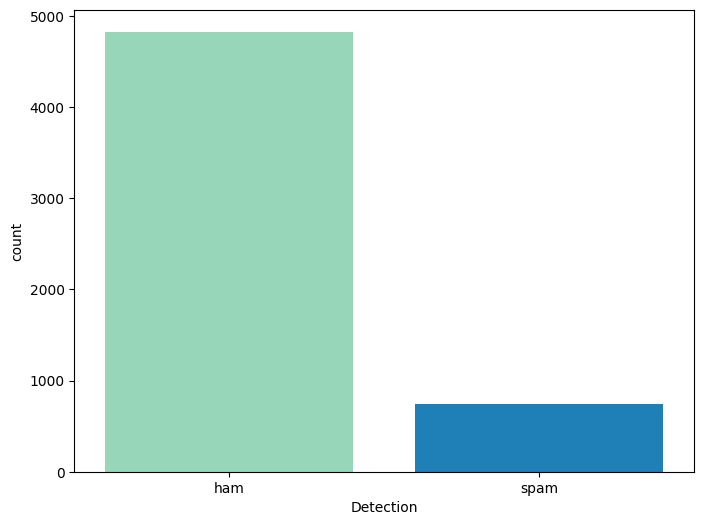

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x="Detection", data=df, palette="YlGnBu", saturation=1.5,)
plt.show()

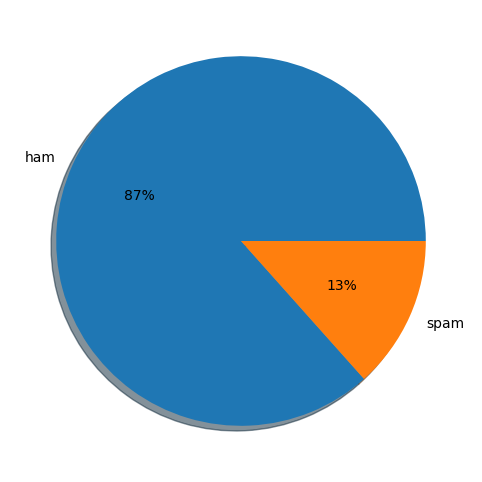

In [ ]:
plt.figure(figsize=(8, 6))
kind_counts = df["Detection"].value_counts()
plt.pie(kind_counts, labels=kind_counts.index, autopct="%0.0f%%", shadow=True)
plt.show()

In [ ]:
import re

In [ ]:
mail=[]

def email_draf(text):
    text = text.lower()
    text = re.sub(r'@\S+', ' ', text)
    text = re.sub(r'http\S+', ' ', text)
    text = re.sub(r'.pic\S+', ' ', text)
    text = re.sub(r'[^a-zA-Z+]', ' ', text)
    return text

df["Clean_msg"] = df["Email_msg"].apply(email_draf)

In [ ]:
df

,Detection,Email_msg,Clean_msg
0,ham,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only ...
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in a wkly comp to win fa cup fina...
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah i don t think he goes to usf he lives aro...
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,this is the nd time we have tried contact u...
5568,ham,Will Ì_ b going to esplanade fr home?,will b going to esplanade fr home
5569,ham,"Pity, * was in mood for that. So...any other s...",pity was in mood for that so any other s...
5570,ham,The guy did some bitching but I acted like i'd...,the guy did some bitching but i acted like i d...


In [ ]:
x=df['Clean_msg']
y=df['Detection']

In [ ]:
x

0       go until jurong point  crazy   available only ...
1                           ok lar    joking wif u oni   
2       free entry in   a wkly comp to win fa cup fina...
3       u dun say so early hor    u c already then say   
4       nah i don t think he goes to usf  he lives aro...
                              ...                        
5567    this is the  nd time we have tried   contact u...
5568                will    b going to esplanade fr home 
5569    pity    was in mood for that  so   any other s...
5570    the guy did some bitching but i acted like i d...
5571                           rofl  its true to its name
Name: Clean_msg, Length: 5572, dtype: object

In [ ]:
y

0        ham
1        ham
2       spam
3        ham
4        ham
        ... 
5567    spam
5568     ham
5569     ham
5570     ham
5571     ham
Name: Detection, Length: 5572, dtype: object

In [ ]:
# OneHotEncoder for "Detection" column
encoder = OneHotEncoder(sparse=False, drop='first')
y = encoder.fit_transform(df[["Detection"]])
y

array([[0.],
       [0.],
       [1.],
       ...,
       [0.],
       [0.],
       [0.]])

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf=TfidfVectorizer()

In [ ]:
x1=tf.fit_transform(x).toarray()         #text to numeric    Tfidf
x1

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
from sklearn.model_selection import train_test_split
x_train_1,x_test_1,y_train_1,y_test_1=train_test_split(x1,y,test_size=0.22,random_state=76)        #tdidf

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
sn=Sequential()

In [ ]:
#input
sn.add(Dense(1000, input_dim=x_train_1.shape[1],activation='relu'))
sn.add(BatchNormalization())

#hidden
sn.add(Dense(1300,activation='relu'))
sn.add(BatchNormalization())
sn.add(Dropout(0.2))

sn.add(Dense(1200,activation='relu'))
sn.add(BatchNormalization())
sn.add(Dropout(0.2))

sn.add(Dense(1050,activation='relu'))
sn.add(BatchNormalization())
sn.add(Dropout(0.2))

sn.add(Dense(1000,activation='relu'))
sn.add(BatchNormalization())
sn.add(Dropout(0.2))

#output
sn.add(Dense(1, activation='sigmoid'))

In [ ]:
sn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
from keras.callbacks import EarlyStopping
Early = EarlyStopping(monitor='val_loss', patience=6)

In [ ]:
hist=sn.fit(x_train_1,y_train_1, validation_split=0.21, callbacks=Early, epochs=75)

Epoch 1/75
108/108 [==============================] - 24s 192ms/step - loss: 0.4244 - accuracy: 0.8739 - val_loss: 0.4764 - val_accuracy: 0.8686
Epoch 2/75
108/108 [==============================] - 37s 347ms/step - loss: 0.1333 - accuracy: 0.9703 - val_loss: 0.5144 - val_accuracy: 0.8686
Epoch 3/75
108/108 [==============================] - 24s 219ms/step - loss: 0.0949 - accuracy: 0.9779 - val_loss: 0.6184 - val_accuracy: 0.8686
Epoch 4/75
108/108 [==============================] - 21s 194ms/step - loss: 0.0903 - accuracy: 0.9837 - val_loss: 0.2112 - val_accuracy: 0.9124
Epoch 5/75
108/108 [==============================] - 21s 198ms/step - loss: 0.0512 - accuracy: 0.9875 - val_loss: 0.2206 - val_accuracy: 0.9419
Epoch 6/75
108/108 [==============================] - 22s 206ms/step - loss: 0.0213 - accuracy: 0.9933 - val_loss: 0.0738 - val_accuracy: 0.9803
Epoch 7/75
108/108 [==============================] - 24s 219ms/step - loss: 0.0459 - accuracy: 0.9918 - val_loss: 0.0700 - val_ac

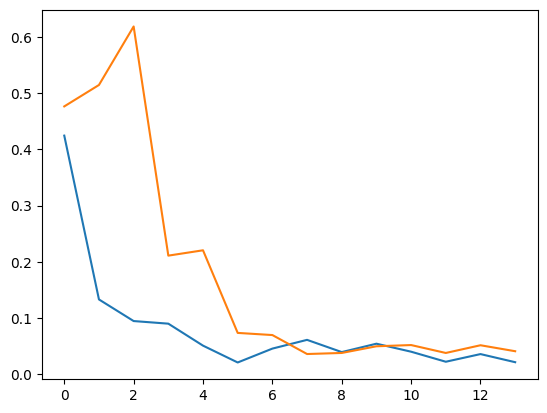

In [ ]:
import matplotlib.pyplot as plt
plt.plot(hist.history['loss'])      #blue
plt.plot(hist.history['val_loss'])  #orange

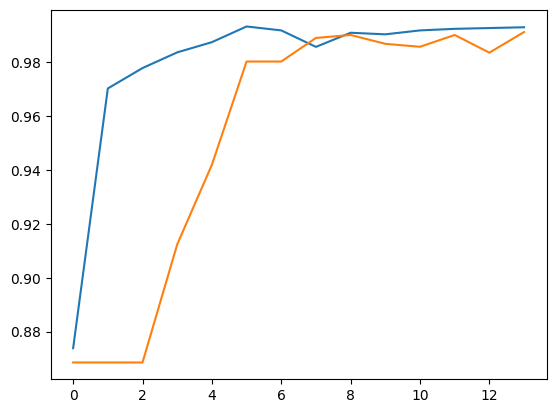

In [ ]:
plt.plot(hist.history['accuracy'])        #blue
plt.plot(hist.history['val_accuracy'])    #orange

In [ ]:
y_pred=sn.predict(x_train_1)
y_pred

136/136 [==============================] - 5s 36ms/step


array([[7.8262546e-04],
       [7.5273332e-05],
       [1.6080459e-04],
       ...,
       [7.0651935e-04],
       [6.3768664e-04],
       [1.5603189e-04]], dtype=float32)

In [ ]:
import statistics

y_pred_train_median = statistics.median(y_pred)
y_pred_train_median

array([0.00032203], dtype=float32)

In [ ]:
y_pred_1=[]
for i in y_pred:
  if i>0.05:
    y_pred_1.append(1)
  else:
    y_pred_1.append(0)


y_pred_1

[0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,


In [ ]:
y_train_1

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

In [ ]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

acc=accuracy_score(y_pred_1,y_train_1)
print('Accuracy_Score=',acc)

clr=classification_report(y_pred_1,y_train_1)
print('Classification_report=\n',clr)

cnf=confusion_matrix(y_pred_1,y_train_1)
print('Confusion_matrix= \n',cnf)

Accuracy_Score= 0.9965485503911643
Classification_report=
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3753
           1       0.99      0.98      0.99       593

    accuracy                           1.00      4346
   macro avg       0.99      0.99      0.99      4346
weighted avg       1.00      1.00      1.00      4346

Confusion_matrix= 
 [[3748    5]
 [  10  583]]


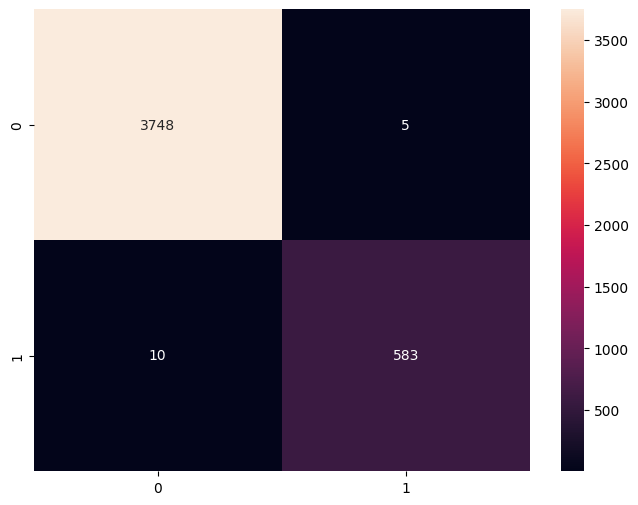

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(cnf,annot=True,fmt='d')
plt.show()

In [ ]:
y_pred_test=sn.predict(x_test_1)
y_pred_test

39/39 [==============================] - 1s 28ms/step


array([[9.99999821e-01],
       [1.83814016e-04],
       [8.14586383e-05],
       ...,
       [1.12025285e-04],
       [3.15049198e-04],
       [7.40384974e-04]], dtype=float32)

In [ ]:

import statistics

y_pred_test_median = statistics.median(y_pred_test)
y_pred_test_median

array([0.00028393], dtype=float32)

In [ ]:
y_pred_test_1=[]
for i in y_pred_test:
  if i>0.05:
    y_pred_test_1.append(1)
  else:
    y_pred_test_1.append(0)


y_pred_test_1

[1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,


In [ ]:
y_test_1

array([[1.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

In [ ]:

acc1=accuracy_score(y_pred_test_1,y_test_1)
print('Accuracy_Score=',acc1)

clr1=classification_report(y_pred_test_1,y_test_1)
print('CLassification_report=\n',clr1)

cnf1=confusion_matrix(y_pred_test_1,y_test_1)
print('Confusion_matrix=\n',cnf1)

Accuracy_Score= 0.9812398042414355
CLassification_report=
               precision    recall  f1-score   support

           0       1.00      0.98      0.99      1080
           1       0.89      0.97      0.92       146

    accuracy                           0.98      1226
   macro avg       0.94      0.97      0.96      1226
weighted avg       0.98      0.98      0.98      1226

Confusion_matrix=
 [[1062   18]
 [   5  141]]


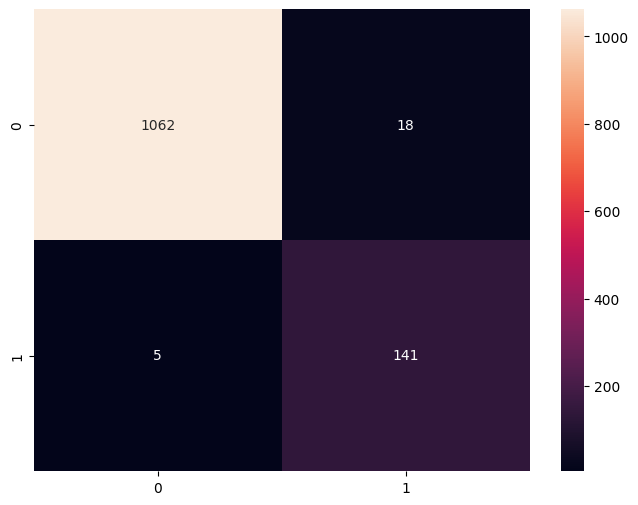

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(cnf1,annot=True,fmt='d')
plt.show()

In [ ]:
text= input('enter the text= ')
text = text.lower()
text = re.sub(r'@\S+', ' ', text)
text = re.sub(r'http\S+', ' ', text)
text = re.sub(r'.pic\S+', ' ', text)
text = re.sub(r'[^a-zA-Z+]', ' ', text)

text=tf.transform([text]).toarray()

prob=sn.predict(text)
print(prob)
print('--'*30)

if prob>0.05:
  print('spam')
else:
  print('no-spam')

enter the text= 
1/1 [==============================] - 0s 34ms/step
[[0.00036602]]
------------------------------------------------------------
no-spam
